# Displays random images from the dataset

In [2]:
import math
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [ ]:

def plot_images(path, images, cols=None, figsize=(12, 8), save_fig=None, max_width=20, max_height=15):
    """
    Plot a flexible number of images in a single figure.

    Parameters
    ----------
    image_paths : list of str
        Paths to the images you want to plot.
    cols : int, optional
        Number of columns in the image grid. If None, it's computed automatically.
    figsize : tuple
        Figure size for matplotlib.

    Returns
    -------
    None
    """

    image_paths = [os.path.join(path, image) for image in images]

    n = len(image_paths)
    
    # Automatically choose number of columns
    if cols is None:
        cols = math.ceil(math.sqrt(n))
    
    rows = math.ceil(n / cols)

    # Flexible figure size
    fig_width = min(cols * 3, max_width)   # 3 inches per image, capped
    fig_height = min(rows * 3, max_height) # 3 inches per image, capped

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    axes = axes.flatten()  # make it a 1D list for easy indexing

    for ax, img_path in zip(axes, image_paths):
        try:
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(os.path.basename(img_path))
            ax.axis("off")
        except Exception as e:
            ax.text(0.5, 0.5, f"Error:\n{e}", ha='center', va='center')
            ax.axis("off")

    # Hide unused subplots if number of images < rows*cols
    for ax in axes[n:]:
        ax.axis("off")
    
    plt.tight_layout()


    if save_fig!=None:
        os.makedirs(os.path.dirname(save_fig), exist_ok=True)
        plt.savefig(save_fig, transparent=True)

    plt.show()
    
    return

['001198.png', '000288.png', '000655.png', '000650.png', '001111.png', '000371.png', '000977.png', '000517.png', '001069.png', '000984.png', '000632.png', '000657.png', '001148.png', '000946.png', '000733.png', '000045.png', '000343.png', '000883.png', '000150.png', '001121.png', '001171.png', '001215.png', '000680.png', '001142.png', '001032.png', '000570.png', '000299.png', '000464.png', '000201.png', '000213.png', '000781.png', '000541.png', '001058.png', '000817.png', '000588.png', '000049.png', '000451.png', '001107.png', '001105.png', '000506.png', '000119.png', '000003.png', '000264.png', '000903.png', '000516.png', '000912.png', '000738.png', '000448.png', '000904.png', '000193.png', '000723.png', '000281.png', '001082.png', '000587.png', '000031.png', '000607.png', '000097.png', '000505.png', '000795.png', '000081.png', '000339.png', '000672.png', '001017.png', '000994.png', '000548.png', '001015.png', '000167.png', '000714.png', '000404.png', '000739.png', '000503.png', '0009

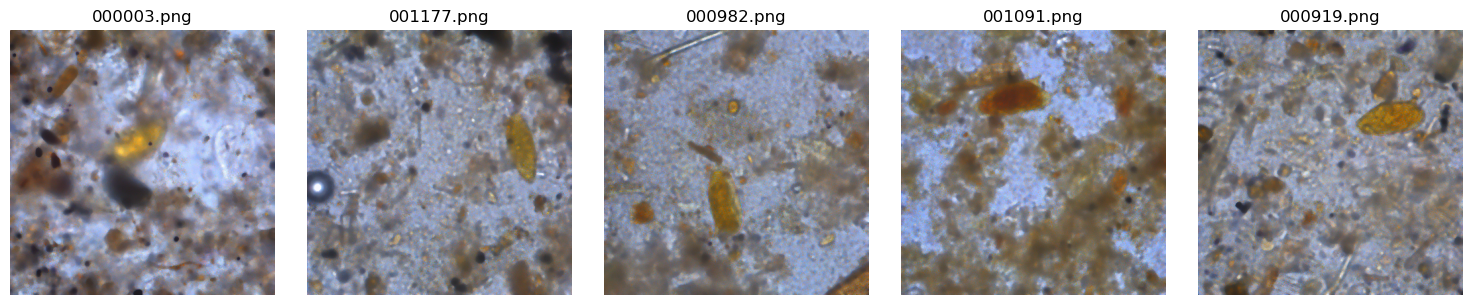

In [ ]:
n_img = 5 # number of random images to be displayed

path = '../datasets/schisto/images'
imgs = os.listdir(path)
print(imgs)


rng = default_rng()            # create Generator once
random_ids = rng.integers(0, len(imgs), size=n_img)  # generate as needed

random_imgs = [imgs[i] for i in random_ids]

plot_images(path, random_imgs, cols=5, save_fig="../report/random_imgs.png")